In [18]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fmin, minimize
import random

# Generate the data

-1.0
1.0


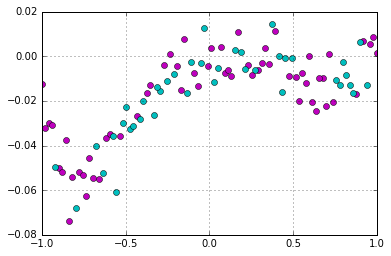

In [29]:
# x_all = np.array([ 0.1       ,  0.56666667,  1.03333333,  1.5       ,  1.96666667,2.43333333,  2.9       ])
# y_all = np.array([ 3.13640523,  1.83109539,  1.31565158,  0.77591068,  1.40453358,1.77338332,  3.05500884])

x_all = np.linspace(-1.0, 1.0, num=100)
np.random.shuffle(x_all)
y_all = .01*x_all-.09*x_all**2+.08*x_all**3-.0003*x_all**4-.08*x_all**5+0.0900*x_all**6 + 0.0025*np.random.normal(loc=0.0, scale=3.0, size=100)

x_all *= 1
y_all *= 1

x_train = x_all[:60]
y_train = y_all[:60]
x_test = x_all[60:]
y_test = y_all[60:]

plt.plot(x_train, y_train, 'mo')
plt.plot(x_test, y_test, 'co')

plt.grid(True)
print np.amin(x_all)
print np.amax(x_all)

# Define simple LinearRegression class & transform function
which might be too simple to use in our application

In [40]:
def toPara(x):
    ret = (len(x), 3)
    ret = np.zeros(ret)
    
    ret[:, 0] = 1
    ret[:, 1] = x
    ret[:, 2] = x**2
    return ret

def toPoly(x):
    ret = (len(x), 7)
    ret = np.zeros(ret)
    
    ret[:, 0] = 1
    ret[:, 1] = x
    ret[:, 2] = x**2
    ret[:, 3] = x**3
    ret[:, 4] = x**4
    ret[:, 5] = x**5
    ret[:, 6] = x**6

    return ret

def toNDegree(x,n):
    ret = np.zeros((len(x),n))
    for i in range(n):
        ret[:,i] = x**i
    return ret


class LinearRegression:
    
    def __init__(self, x, y):
        self.minx = np.amin(x)
        self.maxx = np.amax(x)
        self.px = x
        self.y = y
        self.ndata = len(self.px)

    def cost(self, w):
        sum1 = 0.0
        sum2 = 0.0
        
        oneover2n = (0.5*1/float(self.ndata))
        
        for i in xrange(self.ndata):
            sum1 += (np.dot(w, self.px[i]) - self.y[i])**2
        sum1 *= oneover2n
            
        for i in range(1, len(w)):
            sum2 += w[i]**2
            
        sum2 *= self.lamb
        
        return sum1 + sum2

    def drawlinepara(self):
        x = np.linspace(-1, 1, 100)
        y = self.w[0]+(self.w[1]*x) + (self.w[2]*(x**2))
        
        plt.plot(x, y, 'r')
        
    
    def drawlinepoly(self):
        x = np.linspace(-1, 1, 100)
        y = self.w[0] + (self.w[1]*x) + (self.w[2]*(x**2)) + (self.w[3]*(x**3)) + (self.w[4]*(x**4)) +(self.w[5]*(x**5)) + (self.w[6]*(x**6))
        
        plt.plot(x, y, 'c',linewidth=2.0)
        
    def set_w(self, w):
        self.w = w
        
    def set_lamb(self, lamb):
        self.lamb = lamb

# Draw 3 graph
 - the parabola one
 - the one that is too complex and should cause overfitting
 - the one that is overfitting but regularize it with 0.01

In [ ]:
l = LinearRegression(toPara(x_train), y_train)
l.set_lamb(0)
res = minimize(l.cost, [0, 0, 0])
print 'minimize for para', res.x
plt.plot(x_train, y_train, 'mo')
plt.plot(x_test, y_test, 'ro')
plt.grid(True)
l.set_w(res.x)
l.drawlinepara()
######################

nb_degree = 4000

plt.figure()
plt.plot(x_train, y_train, 'mo')
plt.plot(x_test, y_test, 'ro')
plt.grid(True)
l2 = LinearRegression(toNDegree(x_train,nb_degree), y_train)
l2.set_lamb(0)
res2 = minimize(l2.cost, np.zeros(nb_degree))
print 'minimize for poly', res2.x
l2.set_w(res2.x)
l2.drawlinepoly()

overfitted_weight = res2.x

######################
plt.figure()
plt.plot(x_train, y_train, 'mo')
plt.plot(x_test, y_test, 'ro')
plt.grid(True)
l3 = LinearRegression(toNDegree(x_train,nb_degree), y_train)
l3.set_lamb(0.001)
res3 = minimize(l3.cost, np.zeros(nb_degree))
print 'minimize for poly2', res3.x
l3.set_w(res3.x)
l3.drawlinepoly()

minimize for para [-0.0098495   0.02218884 -0.02018046]


# Original Equation, MSE
then we take derivative of L respect to W to find the influence of L on w vector  
$$ L = \frac{1}{2n}\sum_{i=1}^n(w^Tx_i-y_i)^2+\lambda\sum_{i=1}^nw_i^2 \\ $$
$$ \frac{\partial L}{\partial wi}=0$$


## There are 2 cases which we can work with $\hat{y}$-$y$ &  $y$-$\hat{y}$
Why are we testing these twos, the equation arrangement is different when taking the derivative
, but they yield the same result anyway

### The equation that is $\hat{y}$-$y$
$$ L = \frac{1}{2n}\sum_{i=1}^n(w^Tx_i-y_i)^2+\lambda\sum_{i=1}^nw_i^2;\frac{\partial L}{\partial wi}=0\\ $$
$$
\begin{align}
\frac{2}{2n}\sum_{i=1}^n(w^Tx_i-y_i)\sum_{i=1}^n(x_i) + 2\lambda\sum_{i=1}^n(w_i) & = 0 \\
\frac{1}{n}\sum_{i=1}^n(w^Tx_i-y_i)\sum_{i=1}^n(x_i) & = -2\lambda\sum_{i=1}^n(w_i) \\
\frac{\sum_{i=1}^n(w^Tx_i-y_i)\sum_{i=1}^n(x_i)}{2n\sum_{i=1}^n(w_i)} &= -\lambda
\end{align}
$$

### The equation that is $y$-$\hat{y}$

$$ L = \frac{1}{2n}\sum_{i=1}^n(y_i-w^Tx_i)^2+\lambda\sum_{i=1}^nw_i^2;\frac{\partial L}{\partial wi}=0\\ $$
$$
\begin{align}
-\frac{2}{2n}\sum_{i=1}^n(y_i-w^Tx_i)\sum_{i=1}^n(x_i) + 2\lambda\sum_{i=1}^n(w_i) & = 0 \\
-\frac{1}{n}\sum_{i=1}^n(y_i-w^Tx_i)\sum_{i=1}^n(x_i) & = -2\lambda\sum_{i=1}^n(w_i) \\
\frac{\sum_{i=1}^n(y_i-w^Tx_i)\sum_{i=1}^n(x_i)}{2n\sum_{i=1}^n(w_i)} &= \lambda
\end{align}
$$



# Define solve_for_lambda function
which is the function what does exactly the same as the above equation to find the lambda  
However, there are 2 variations of them, you can adjust nicely according to the equation

In [8]:
def solve_for_lambda(x,y,w):   
    sum_yreal_predict = 0.0
    sum_px = 0.0
    sum_w = 0.0
    lamb = 0.0
    ndata = len(x)
    px = toPoly(x)
    for i in xrange(ndata):
        sum_yreal_predict += (np.dot(w, px[i]) - y[i])
        sum_px += sum(px[i,:])
    sum_yreal_predict *= sum_px
    for i in xrange(len(w)):
        sum_w += w[i]**2
    sum_w *= 2*ndata
    lamb = (sum_yreal_predict/sum_w)
    return lamb if lamb > 0 else -1*lamb

# Use the weight from the overfitting model to train with expected lambda in this model then plot

expected_lambda 0.00125984024047


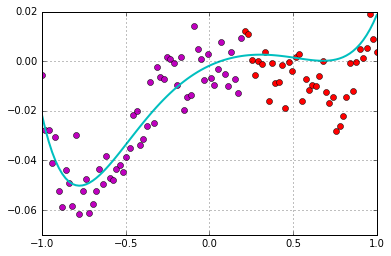

In [24]:
plt.figure()
plt.plot(x_train, y_train, 'mo')
plt.plot(x_test, y_test, 'ro')
plt.grid(True)
l4 = LinearRegression(toPoly(x_train), y_train)
expected_lambda = solve_for_lambda(x_train,y_train, overfitted_weight)
print "expected_lambda", expected_lambda
l4.set_lamb(expected_lambda)
res4 = minimize(l4.cost, [0, 0, 0, 0, 0, 0, 0])
l4.set_w(res4.x)
l4.drawlinepoly()

# Futher compute another lambda using the weight from l4
should not work as we expected

expected_lambda 0.0019810600665


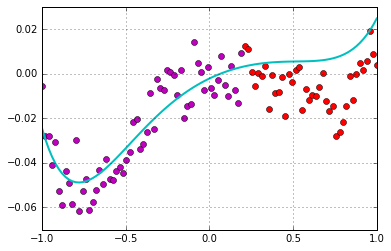

In [25]:
plt.figure()
plt.plot(x_train, y_train, 'mo')
plt.plot(x_test, y_test, 'ro')
plt.grid(True)
l5 = LinearRegression(toPoly(x_train), y_train)
expected_lambda = solve_for_lambda(x_train,y_train, res4.x)
print "expected_lambda", expected_lambda
l5.set_lamb(expected_lambda)
res5 = minimize(l5.cost, [0, 0, 0, 0, 0, 0, 0])
l5.set_w(res5.x)
l5.drawlinepoly()

In [26]:
x_test_poly = toPoly(x_test)
def get_sum_mse(w):
    return sum([(np.dot(w, x_test_poly[i]) - y_test[i])**2 for i in range(len(x_test))])

print "mse_poly_overfitted", get_sum_mse(res2.x)
print "mse_poly_001", get_sum_mse(res3.x)
print "mse_poly_solve_lamb4", get_sum_mse(res4.x)
print "mse_poly_solve_lamb5", get_sum_mse(res5.x)

mse_poly_overfitted 0.0171173939942
mse_poly_001 0.00403855485403
mse_poly_solve_lamb4 0.00586506985183
mse_poly_solve_lamb5 0.0105286385589
